In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

In [2]:
from dataset import Dataset

In [3]:
from datapreprocessing import DataPreprocessor

In [4]:
path = r'E:\knns\data\cat_dog'
width = 84
height = 84

In [5]:
loader = Dataset(path=path, width=width, height=height)

In [6]:
y = loader.load_labels(12500, 12500)

In [7]:
X = loader.load_images(path=path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

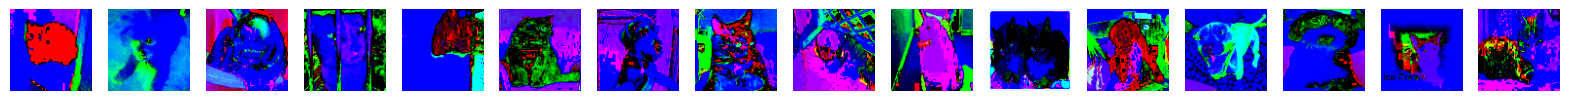

In [8]:
loader.plot_random_samples(X ,16)

In [9]:
print(len(X))
print(len(y))

25000
25000


In [10]:
def train_test_split(X:np.ndarray, y:np.ndarray, train_split:float=0.7, val_split:float=0.2, test_split:float=0.1, random_state=None):
    # Check if splits add up to 1
    if float(round(train_split + val_split + test_split)) != 1.0:
        raise ValueError("train_split, val_split and test_split must add up to 1")

    # Set the random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    # Calculate the size of the train, validation and test sets
    train_size = int(X.shape[0] * train_split)
    val_size = int(X.shape[0] * val_split)
    
    # Split the indices into training set indices, validation set indices and test set indices
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size+val_size]
    test_indices = indices[train_size+val_size:]
    
    # Use the indices to create the training set, validation set and test set
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_val = X[val_indices]
    y_val = y[val_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [11]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(X, y)

In [12]:
def remove_background(images):
    processed_images = []

    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) if len(img.shape) == 2 else img
        img = np.uint8(img)

        mask = np.zeros(img.shape[:2], np.uint8)
        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)

        # Calculate the rect such that it's always within the bounds of the image
        rect = (int(0.1 * img.shape[1]), int(0.1 * img.shape[0]), int(0.8 * img.shape[1]), int(0.8 * img.shape[0]))

        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        img = img * mask2[:, :, np.newaxis]

        processed_images.append(img)

    return np.array(processed_images)

In [13]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_val: {y_val.shape}")

X_train: (17500, 84, 84, 3)
X_test: (2500, 84, 84, 3)
X_val: (5000, 84, 84, 3)
y_train: (17500,)
y_test: (2500,)
y_val: (5000,)


In [14]:
num_training:int = X_train.shape[0]
# mask = list(range(num_training))
# X_train = X_train[mask]
# y_train = y_train[mask]

num_test:int = X_test.shape[0]
# mask = list(range(num_test))
# X_test = X_test[mask]
# y_test = y_test[mask]

num_val:int = X_val.shape[0]
# mask = list(range(num_val))
# X_val = X_val[mask]
# y_val = y_val[mask]

In [15]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_val: {y_val.shape}")

X_train: (17500, 84, 84, 3)
X_test: (2500, 84, 84, 3)
X_val: (5000, 84, 84, 3)
y_train: (17500,)
y_test: (2500,)
y_val: (5000,)


In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_val: {y_val.shape}")

X_train: (17500, 21168)
X_test: (2500, 21168)
X_val: (5000, 21168)
y_train: (17500,)
y_test: (2500,)
y_val: (5000,)


In [17]:
class KNearestNeighbor:

    __slots__ = ['X_train', 'y_train', 'k']

    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        dists = self.euclidean(X)
        return self.predict_labels(dists, k)
    
    def euclidean(self, X):
        # Calculate the argument of the square root
        arg = np.sum(X**2, axis=1, keepdims=True) + np.sum(self.X_train.T**2, axis=0, keepdims=True) - 2 * np.dot(X, self.X_train.T)
        arg = np.clip(arg, 0, None)
        dists = np.sqrt(arg)
        return np.array(dists)

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            closest_y = closest_y.astype(int)
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [18]:
classifier = KNearestNeighbor()
classifier.fit(X_train, y_train)
val_dist = classifier.euclidean(X_val)
# print("Euclidean dist:", val_dist)
test_dist = classifier.euclidean(X_test)

In [19]:
y_val_pred = classifier.predict_labels(val_dist, k=1)
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_val, accuracy))

Got 2788 / 5000 correct => accuracy: 0.557600


In [20]:
y_test_pred = classifier.predict_labels(test_dist, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 1362 / 2500 correct => accuracy: 0.544800


In [21]:
index = 0
k = 0

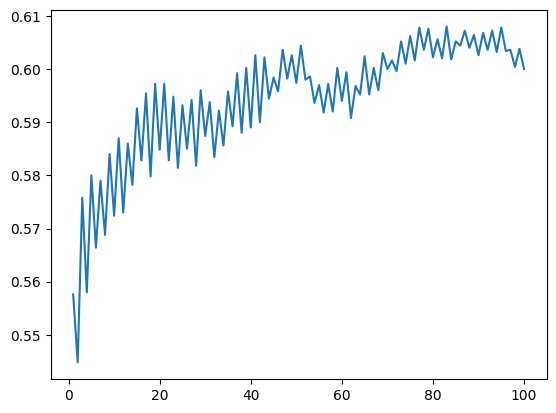

Max accuracy at k= 83
Accuracy = 0.608


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode

# Fit the model once with the maximum k
max_k = 100
neigh = KNeighborsClassifier(n_neighbors=max_k)
neigh.fit(X_train, y_train)

# Get the distances and indices of the k nearest neighbors for each point in the validation set
distances, indices = neigh.kneighbors(X_val)

lix = []
liy = []
acc = 0
index = 0

# Calculate the accuracy for each k
for k in range(1, max_k + 1):
    knn_labels = y_train[indices[:, :k]]
    y_pred, _ = mode(knn_labels, axis=1)
    accuracy = (y_pred.ravel() == y_val).mean()
    liy.append(accuracy)

    if accuracy > acc:
        acc = accuracy
        index = k - 1

    lix.append(k)

plt.plot(lix, liy)
plt.show()
print(f"Max accuracy at k= {index + 1}")
print(f"Accuracy = {acc}")


In [23]:
k = index + 1

In [24]:
print("Using our own k-NN")
classifier = KNearestNeighbor()
classifier.fit(X_train, y_train)
dists = classifier.euclidean(X_test)
y_test_pred = classifier.predict_labels(dists, k=k)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print(f'With k = {k} Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Using our own k-NN
With k = 83 Got 1463 / 2500 correct => accuracy: 0.585200


In [25]:
def predict_image(image_path, X_train, y_train, k=k):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)
    img = (img - np.mean(img)) / np.std(img)
    img = np.reshape(img, (1, img.shape[0] * img.shape[1] * img.shape[2]))
    classifier = KNearestNeighbor()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(img)    
    if int(y_pred[0]) == 0:
        return "Cat"
    elif int(y_pred[0]) == 1:
        return "Dog"
    else:
        return None

In [26]:
image_path = r"E:\knns\data_new\dog.578.jpg"
prediction = predict_image(image_path, X_train, y_train,k=k)
print("Image is", prediction)

Image is Dog
